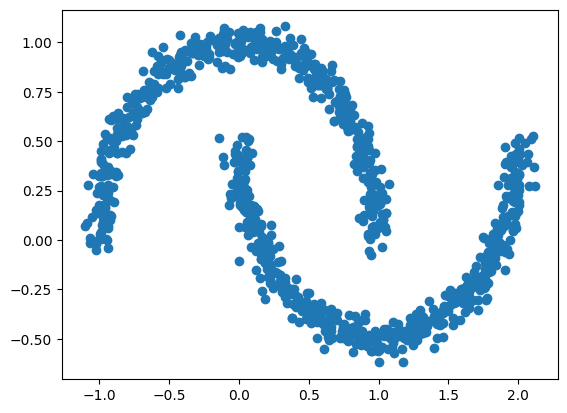

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import random

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [73]:
dbscan = DBSCAN(eps=0.1, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=2)

In [74]:
# show the unique values of labels
print('Unique labels values: ', np.unique(dbscan.labels_))
print('Core instances indexes: ', len(dbscan.core_sample_indices_))
print('Components: ', list(map(lambda p: list(p), list(dbscan.components_)[:2])))

Unique labels values:  [-1  0  1]
Core instances indexes:  999
Components:  [[-0.02137124176534741, 0.4061860760728654], [0.9767004512590101, -0.4583230648958083]]


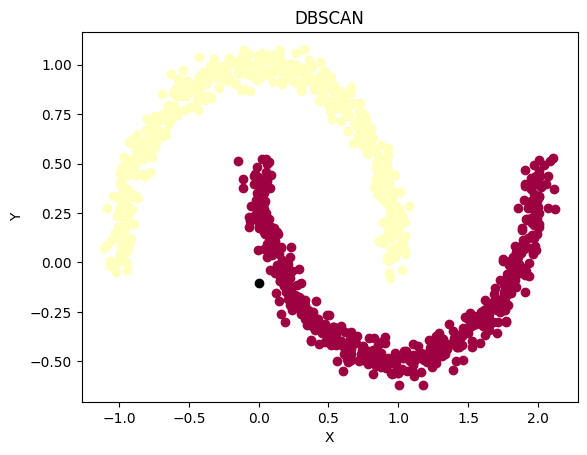

In [75]:
labels = dbscan.fit_predict(X)

# Plotar os dados com cores diferentes para cada cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído (outliers) são plotados em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN')
plt.show()